Install dependencies

In [1]:
!pip install -q ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.2 MB/s eta 0:00:00


Download dataset from Roboflow

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mbSVmRH7SMKpi45sjpKJ")
project = rf.workspace("ya-ucdso").project("fire-and-smoke-ifg7x")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-and-smoke-1 in yolov8:: 100%|██████████| 992/992 [00:00<00:00, 7727.03it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Train YOLOv8**

In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

In [4]:
# Custom data.yaml will be in dataset.location
data_yaml = f"{dataset.location}/data.yaml"

model.train(
    data=data_yaml,
    epochs=50,
    imgsz=640,
    batch=8,
    project="/content/yolo_fire_smoke",
    name="yolov8_fire_smoke",
)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fire-and-smoke-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_fire_smoke, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9ed59c1040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

Validate

In [5]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 667.5±248.5 MB/s, size: 29.1 KB)
val: Scanning /content/fire-and-smoke-1/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 41/41 9.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.3s/it 3.8s
                   all         41        100      0.839      0.749       0.82      0.545
                  fire         41         57      0.875      0.825      0.894       0.67
                 smoke         29         43      0.803      0.674      0.746      0.419
Speed: 20.1ms preprocess, 24.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ul

Display graphs

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

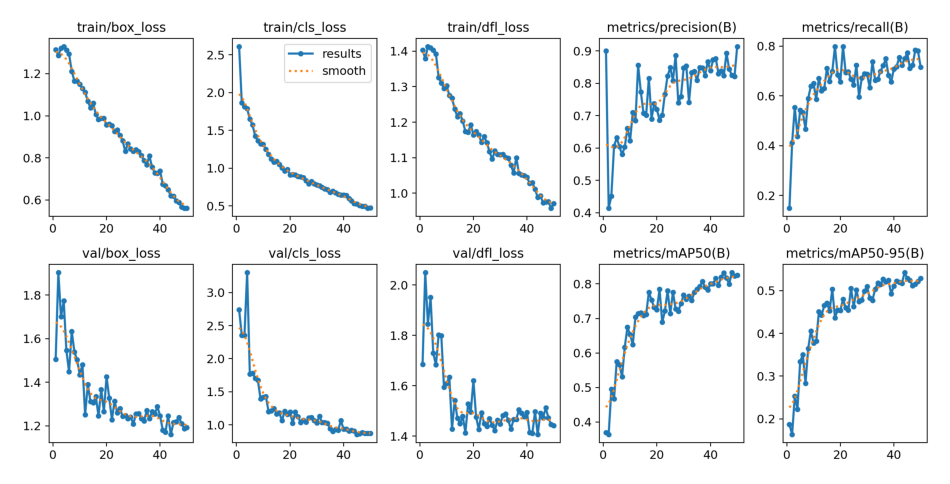

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/yolo_fire_smoke/yolov8_fire_smoke/results.png")
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis("off")


**Test Model on a Custom Image**

In [14]:
from google.colab import files
uploaded = files.upload()


Saving Firefighters-trying-to-contain-a-fire-at-teh-Zubair-oilfield-in-southern-Iraq.-Photo-INA.jpg to Firefighters-trying-to-contain-a-fire-at-teh-Zubair-oilfield-in-southern-Iraq.-Photo-INA.jpg


Run Inference

In [15]:
model = YOLO("/content/yolo_fire_smoke/yolov8_fire_smoke/weights/best.pt")

results = model.predict(
    source=list(uploaded.keys())[0],
    conf=0.25,
    save=True
)



image 1/1 /content/Firefighters-trying-to-contain-a-fire-at-teh-Zubair-oilfield-in-southern-Iraq.-Photo-INA.jpg: 544x640 6 fires, 2 smokes, 41.2ms
Speed: 3.2ms preprocess, 41.2ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
Results saved to /content/runs/detect/predict2


Display Output Image

(np.float64(-0.5), np.float64(859.5), np.float64(717.5), np.float64(-0.5))

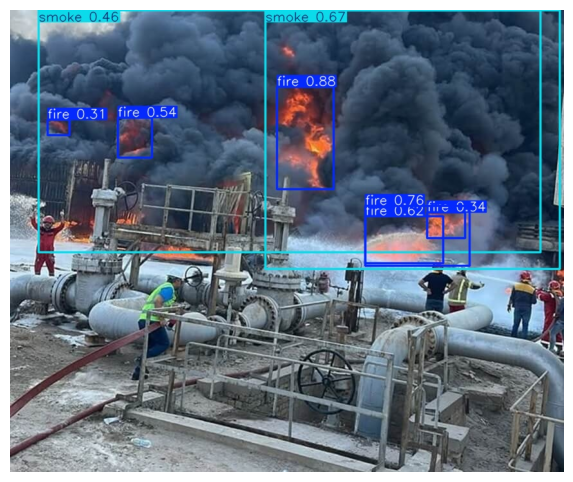

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(results[0].save_dir + "/" + list(uploaded.keys())[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
